# Analysis of Eureka-1

**Launch team:** Space Enterprises at Berkeley

**Launch date:** 2022.12.03

**Launch video:** https://www.youtube.com/watch?v=Hrbeg6FNlpY

**Propulsion type:** Liquid (LOX + Propane, N2 as pressurant gas)


## Importing Libraries

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
%matplotlib widget

## Importing Flight Data

In [3]:
nominal_flight_time = 12 # s

# Dynamics data
barometric_pressure = np.loadtxt('flight_data/baroPressure.csv', delimiter=',', skiprows=1) # mbar
barometric_altitude = np.loadtxt('flight_data/baroAltitude.csv', delimiter=',', skiprows=1) # m (converted from barometric pressure)
gps_latitude = np.loadtxt('flight_data/gpsLatitude.csv', delimiter=',', skiprows=1) # degress
gps_longitude = np.loadtxt('flight_data/gpsLongitude.csv', delimiter=',', skiprows=1) # degrees
velocity_x = np.loadtxt('flight_data/velX.csv', delimiter=',', skiprows=1) # m/s (integrated from acceleration)
velocity_y = np.loadtxt('flight_data/velY.csv', delimiter=',', skiprows=1) # m/s (integrated from acceleration)
velocity_z = np.loadtxt('flight_data/velZ.csv', delimiter=',', skiprows=1) # m/s (integrated from acceleration)
acceleration_x = np.loadtxt('flight_data/accelX.csv', delimiter=',', skiprows=1) # m/s^2
acceleration_y = np.loadtxt('flight_data/accelY.csv', delimiter=',', skiprows=1) # m/s^2
acceleration_z = np.loadtxt('flight_data/accelZ.csv', delimiter=',', skiprows=1) # m/s^2
q_w = np.loadtxt('flight_data/qW.csv', delimiter=',', skiprows=1) # quaternion
q_x = np.loadtxt('flight_data/qX.csv', delimiter=',', skiprows=1) # quaternion
q_y = np.loadtxt('flight_data/qY.csv', delimiter=',', skiprows=1) # quaternion
q_z = np.loadtxt('flight_data/qZ.csv', delimiter=',', skiprows=1) # quaternion

# Liquid motor data
lox_ullage = np.loadtxt('flight_data/loxUllage.csv', delimiter=',', skiprows=1) # m
fuel_ullage = np.loadtxt('flight_data/fuelUllage.csv', delimiter=',', skiprows=1) # m
pressurant_total_pressure = np.loadtxt('flight_data/pressurantPt.csv', delimiter=',', skiprows=1) # psi

# Missing data
# gyro
# mag
# temp
# gps altitude

## Plotting Flight Trajectory

<IPython.core.display.Javascript object>


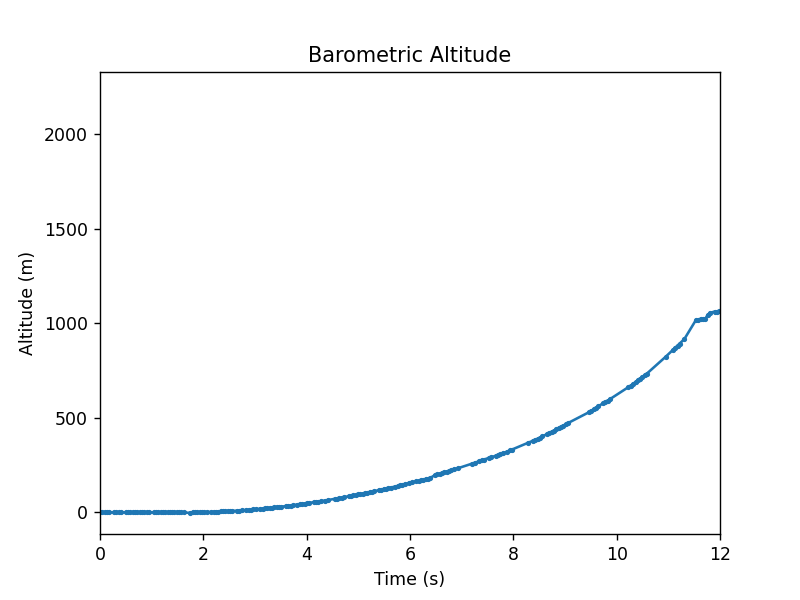

In [4]:
plt.figure()
plt.plot(barometric_altitude[:,0], barometric_altitude[:,1], marker='o', markersize=2)
plt.xlabel('Time (s)')
plt.ylabel('Altitude (m)')
plt.title('Barometric Altitude')
plt.xlim(0, nominal_flight_time)
plt.show()

<IPython.core.display.Javascript object>


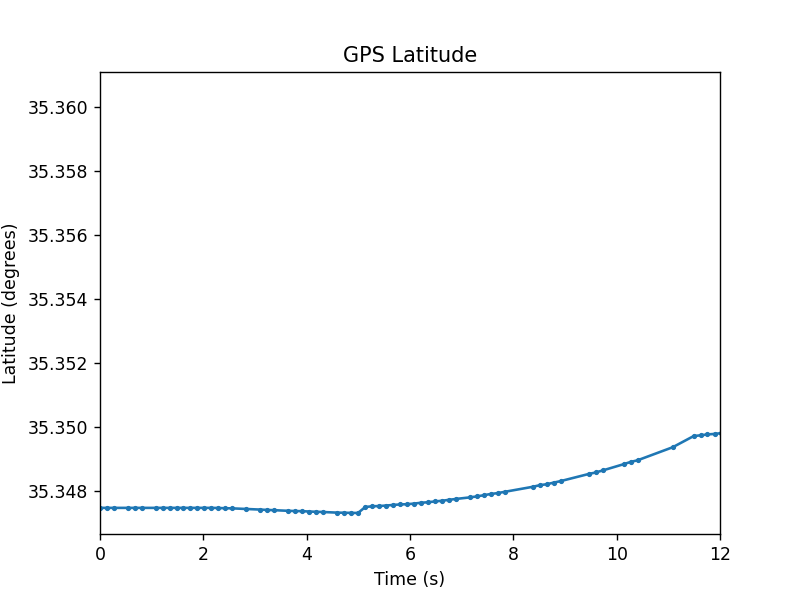

In [5]:
plt.figure()
plt.plot(gps_latitude[:,0], gps_latitude[:,1], marker='o', markersize=2)
plt.xlabel('Time (s)')
plt.ylabel('Latitude (degrees)')
plt.title('GPS Latitude')
plt.xlim(0, nominal_flight_time)
plt.show()

<IPython.core.display.Javascript object>


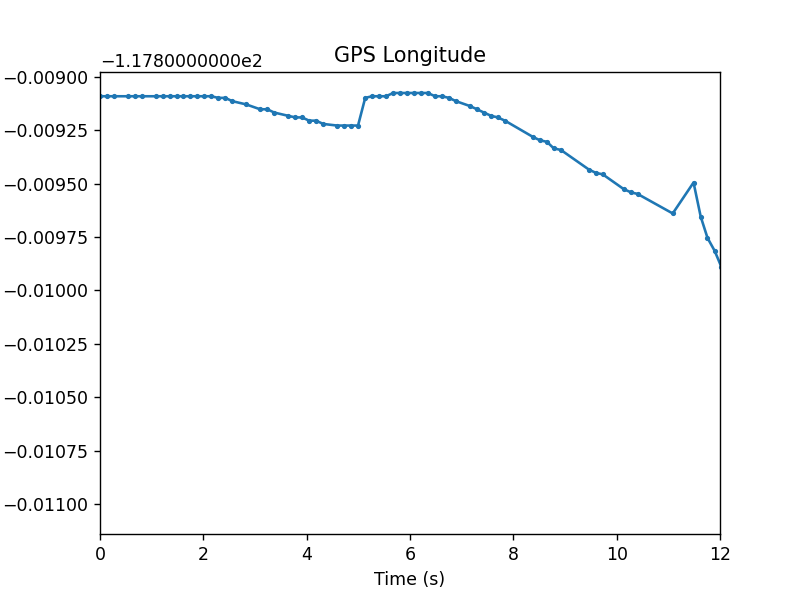

In [6]:
plt.figure()
plt.plot(gps_longitude[:,0], gps_longitude[:,1], marker='o', markersize=2)
plt.xlabel('Time (s)')
plt.ylabel('Longitude (degrees)')
plt.title('GPS Longitude')
plt.xlim(0, nominal_flight_time)
plt.show()

<IPython.core.display.Javascript object>


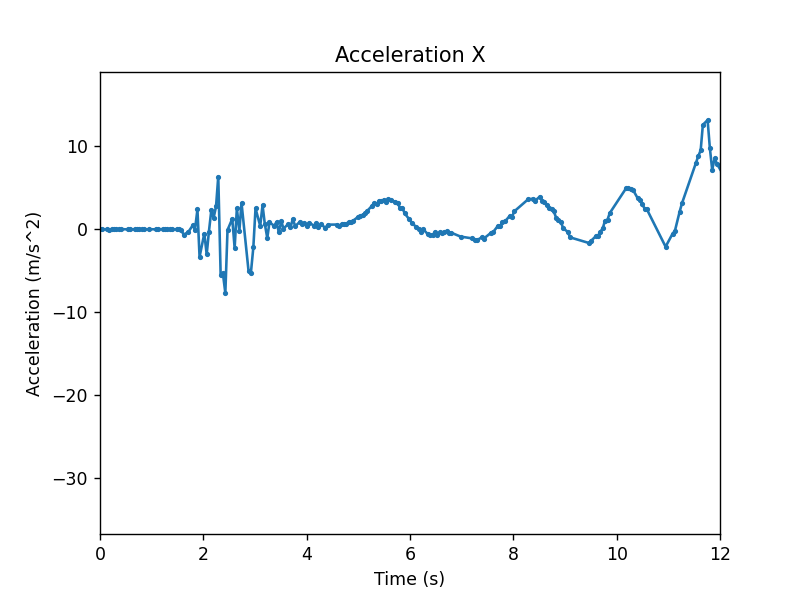

In [7]:
plt.figure()
plt.plot(acceleration_x[:,0], acceleration_x[:,1], marker='o', markersize=2)
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s^2)')
plt.title('Acceleration X')
plt.xlim(0, nominal_flight_time)
plt.show()


<IPython.core.display.Javascript object>


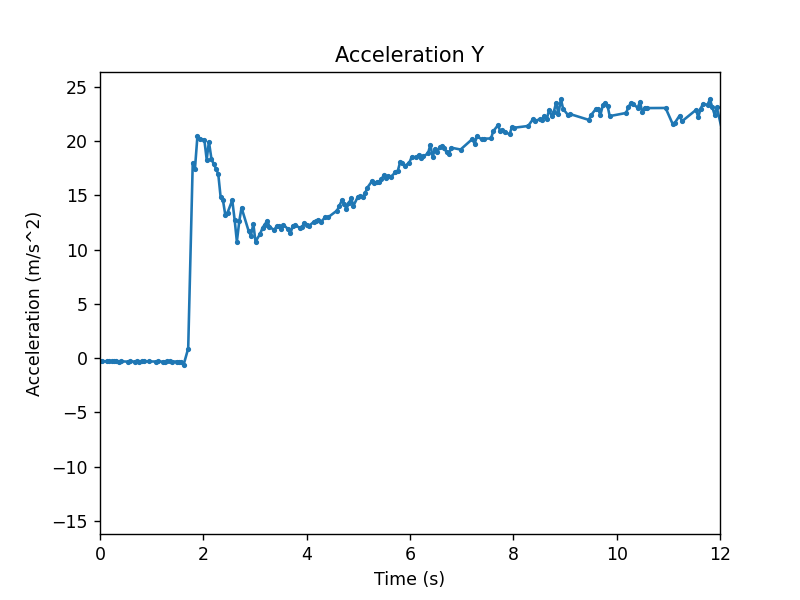

In [8]:
plt.figure()
plt.plot(acceleration_y[:,0], acceleration_y[:,1], marker='o', markersize=2)
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s^2)')
plt.title('Acceleration Y')
plt.xlim(0, nominal_flight_time)
plt.show()

<IPython.core.display.Javascript object>


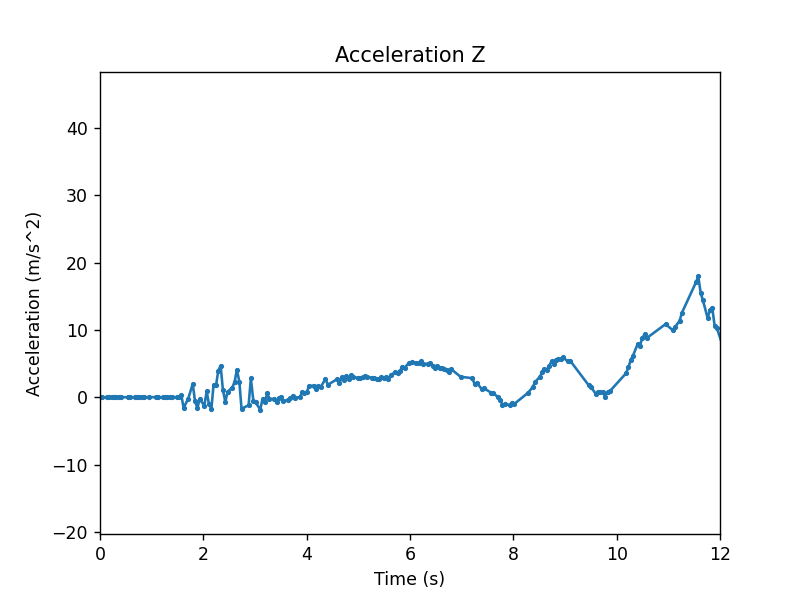

In [9]:
plt.figure()
plt.plot(acceleration_z[:,0], acceleration_z[:,1], marker='o', markersize=2)
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s^2)')
plt.title('Acceleration Z')
plt.xlim(0, nominal_flight_time)
plt.show()


<IPython.core.display.Javascript object>


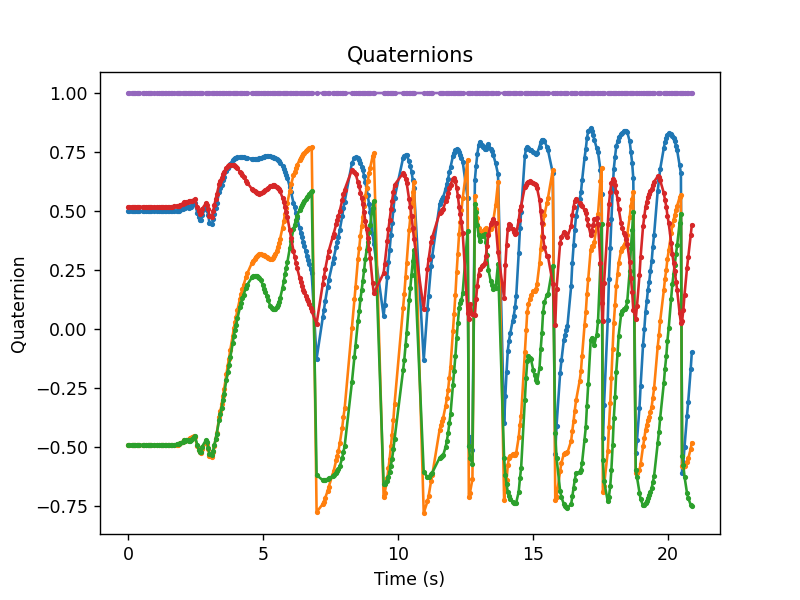

In [10]:
plt.figure()
plt.plot(q_x[:,0], q_x[:,1], marker='o', markersize=2)
plt.plot(q_y[:,0], q_y[:,1], marker='o', markersize=2)
plt.plot(q_z[:,0], q_z[:,1], marker='o', markersize=2)
plt.plot(q_w[:,0], q_w[:,1], marker='o', markersize=2)
plt.plot(q_z[:,0], q_z[:,1]**2 + q_x[:,1]**2 + q_y[:, 1]**2 + q_w[:,1]**2, marker='o', markersize=2)
plt.xlabel('Time (s)')
plt.ylabel('Quaternion')
plt.title('Quaternions')
# plt.xlim(0, nominal_flight_time)
plt.show()

## Animate Attitude

In [ ]:
%pip install vedo

In [4]:
from time import sleep
from vedo import *
settings.default_backend = 'vtk'

In [5]:
import numpy as np
def angular_velocities(q1, q2, dt):
    print()
    return list((2 / dt) * np.array([
        q1[0]*q2[1] - q1[1]*q2[0] - q1[2]*q2[3] + q1[3]*q2[2],
        q1[0]*q2[2] + q1[1]*q2[3] - q1[2]*q2[0] - q1[3]*q2[1],
        q1[0]*q2[3] - q1[1]*q2[2] + q1[2]*q2[1] - q1[3]*q2[0]]))

In [22]:
plt = Plotter(axes=4, interactive=False)
rocket = load("Imperius v103.stl").c("blue")
# rocket2 = load("Imperius v103.stl").c("black")
rocket.rotate(angle=-90, axis=(0, 0, 1), point=rocket.center_of_mass())
# rocket2.rotate(angle=-180, axis=(0, 0, 1), point=rocket.center_of_mass())

i = 1
angle = None
for t, q0, q1, q2, q3 in zip(q_w[:, 0], q_w[:, 1], q_x[:, 1], q_y[:, 1], q_z[:, 1]):
    try:
        try:
            # Reset rocket rotation to original attitude before rotation again in the next step
            rocket.rotate(rad=True, angle=-angle, point=rocket.center_of_mass(), axis=axis)
        except:
            pass

        altitude = barometric_altitude[i, 1]
        velocity = (velocity_x[i, 1]**2 + velocity_y[i, 1]**2 + velocity_z[i, 1]**2)**0.5
        acceleration = (1/9.8)*(acceleration_x[i, 1]**2 + acceleration_y[i, 1]**2 + acceleration_z[i, 1]**2)**0.5

        # Compute angular velocities
        if i == 1:
            omega = np.zeros(3)
            q_0_old, q_1_old, q_2_old, q_3_old = q0, q1, q2, q3
            t_old = t
        else:
            omega = angular_velocities([q_0_old, q_1_old, q_2_old, q_3_old], [q0, q1, q2, q3], t - t_old)
            q_0_old, q_1_old, q_2_old, q_3_old = q0, q1, q2, q3
            t_old = t
        

        # Create text stamps
        time_text = Text2D(f"Time: {t:.2f} s", pos=(0.95, 0.25), c="k", bg="w", s=1, font="Normografo", justify="right")
        altitude_text = Text2D(f"Altitude: {altitude:.2f} m", pos=(0.95, 0.20), c="k", bg="w", s=1, font="Normografo", justify="right")
        velocity_text = Text2D(f"Velocity: {velocity:.2f} m/s", pos=(0.95, 0.15), c="k", bg="w", s=1, font="Normografo", justify="right")
        acceleration_text = Text2D(f"Acceleration: {acceleration:.2f} G's", pos=(0.95, 0.10), c="k", bg="w", s=1, font="Normografo", justify="right")
        roll_rate_text = Text2D(f"Angular Velocity: {omega[0]:.2f}, {omega[1]:.2f}, {omega[2]:.2f} rad/s", pos=(0.95, 0.05), c="k", bg="w", s=1, font="Normografo", justify="right")

        # Compute rocket rotation
        angle = np.arccos(2*q0**2 - 1)
        k = np.sin(angle / 2)
        axis = (q1 / k, q2 / k, q3 / k)
        rocket.rotate(rad=True, angle=angle, point=rocket.center_of_mass(), axis=axis)

        if i == 1:
            plt.add(rocket, time_text, altitude_text, velocity_text, acceleration_text, roll_rate_text)
            plt.show(viewup=[0, 0, 1], interactive=False)
        else:
            # Remove last text and add new one
            plt.pop().pop().pop().pop().pop().add(time_text, altitude_text, velocity_text, acceleration_text, roll_rate_text)
            plt.show(viewup=[0, 0, 1], resetcam=False, interactive=False)

        # Sleep for x s
        sleep(1*(q_w[1, 0] - q_w[0, 0]))
        plt.process_events()
        i += 1
        if i > 400:
            break

    except Exception as E:
        plt.process_events()
        break

plt.interactive().close()


[vedo.plotter.py:890] WARNING: call to add() but Plotter was not initialized with show()


In [6]:
q_w[1, 0] - q_w[0, 0]

0.042

In [ ]:
from vedo import *

def animate_rotation(model_path, x, y, z, q0, q1, q2, q3, video_path, start=0, stop=50, fps=4):
    """Rocket attitude during the flight.
    Parameters
    ----------
    model_path : str
        Object model path, it can be a file exported from cad or other type of
        3D object.
    video_path: str
        Path in which the video will be saved.
    start: int
        Time which the flight animation will be started
    stop: int
        Time which the flight animation will end
    fps: int
        Frame rate of the video that will be generated
    Return
    ------
    None
    """
    world = Box([x(0), y(0), z(0)], 200, 200, 2000).wireframe()
    video = Video(backend='cv2', name=os.path.join(video_path, 'rotation_animation.mp4'))

    rocket = load(model_path).scale(2)
    rocket.pos(x(0), y(0), z(0))  # make up some movement
    rocket.rotate(3.14/2, axis=(0,1,0), axis_point=(x(0), y(0), z(0)), rad=True)

    # Setup the scene
    show(world, rocket, axes=1, viewup="z", interactive=0)
    timeRange = np.linspace(start, stop, fps * (stop - start))
    for t in timeRange:
        angle = np.arccos(2*self.e0(t)**2 - 1)
        k = np.sin(angle / 2)
        axis = (self.e1(t) / k, self.e2(t) / k, self.e3(t) / k)
        rocket.rotate(rad=True, angle=angle, axis_point=(self.x(0), self.y(0), self.z(0)), axis=axis)
        show(world, rocket)
        video.addFrame()
        rocket.rotate(rad=True, angle=-angle, axis_point=(self.x(0), self.y(0), self.z(0)), axis=axis)
    video.close()